<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

import os
import re
from functools import reduce
from collections import defaultdict 

from scipy import stats

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 'sales_data_with_stores.csv',
 'ab_experiment.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 'sales_vs_discount.csv',
 'lead_conversion.csv',
 'app_wau.csv',
 'mock_sales_data.csv',
 'online_retail.xlsx',
 'test.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'match_result_test.csv',
 'mall_customers.csv',
 'ecommerce-data.csv',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'cookie_cats.csv',
 'scanner_data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
cnt_ret = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name='retention', value_name='result')
cnt_ret = cnt_ret.groupby(['version','retention','result'])['userid'].count().reset_index().rename(columns = {'userid':'cnt'})
cnt_ret['ratio'] = cnt_ret.groupby(['version','retention'])['cnt'].apply(lambda x :round(x/sum(x)*100,2))
cnt_ret.head()

,version,retention,result,cnt,ratio
0,gate_30,retention_1,False,24666,55.18
1,gate_30,retention_1,True,20034,44.82
2,gate_30,retention_7,False,36198,80.98
3,gate_30,retention_7,True,8502,19.02
4,gate_40,retention_1,False,25370,55.77


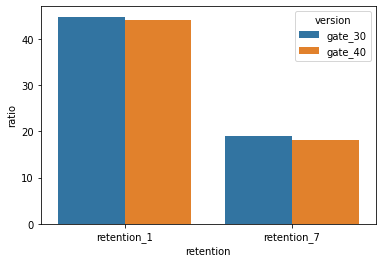

In [7]:
sns.barplot(data = cnt_ret[cnt_ret['result'] == True], x = 'retention', y = 'ratio', hue = 'version')

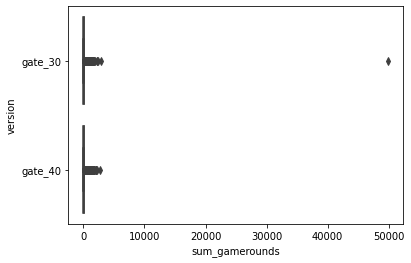

In [8]:
sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')

In [10]:
df = df[df['sum_gamerounds'] <= 10000]

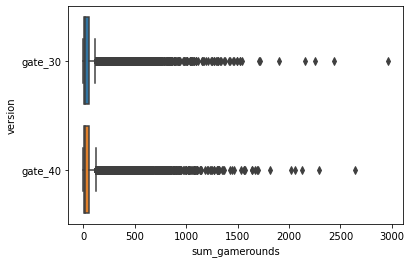

In [11]:
sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')

((array([-4.32330209, -4.12353114, -4.01483812, ...,  4.01483812,
          4.12353114,  4.32330209]),
  array([   0,    0,    0, ..., 2438, 2640, 2961])),
 (71.54691083221576, 51.32025324876927, 0.696746813756345))

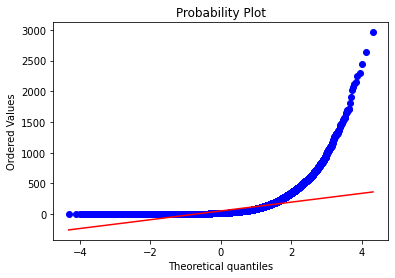

In [14]:
stats.probplot(df['sum_gamerounds'], dist='norm', plot=plt)

In [16]:
stat, p = stats.shapiro(df['sum_gamerounds'])
print(stat, p)

0.48558586835861206 0.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.


In [20]:
stat, p = stats.normaltest(df['sum_gamerounds'])
print(str(stat)+'\n'+ str(p))

104181.60505148777
0.0


In [21]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(stat) + '\n' + str(p))

18528909.99029161
0.0


In [26]:
n = 1000
boots = pd.DataFrame([df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)])
boots

version,gate_30,gate_40
sum_gamerounds,51.675093,50.555305
sum_gamerounds,53.291554,51.982139
sum_gamerounds,51.287095,50.433166
sum_gamerounds,50.580040,51.208018
sum_gamerounds,50.723914,51.285746
...,...,...
sum_gamerounds,48.058916,48.891732
sum_gamerounds,54.294953,51.158699
sum_gamerounds,50.932751,50.209741
sum_gamerounds,50.671136,50.286426


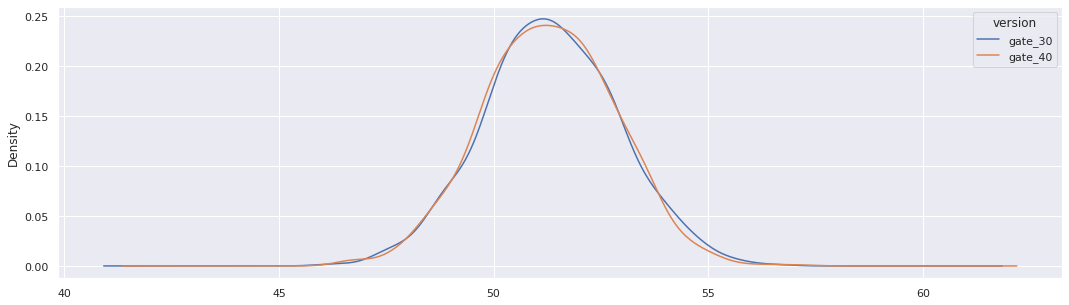

In [32]:
boots.plot.kde()
sns.set(rc = {'figure.figsize':(18,5)})
plt.show()

In [39]:
boots_diff = boots['gate_30'] - boots['gate_40']
boots_pos = len(boots_diff[boots_diff >= 0])
boots_pos/n

0.504

# Iterators

In [40]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [41]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}